Filtered data size: 100000 events with total charge zero


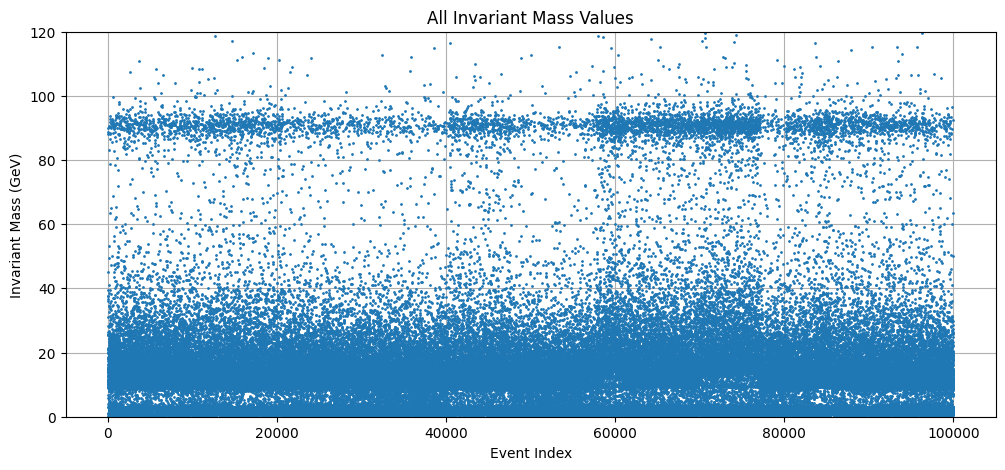

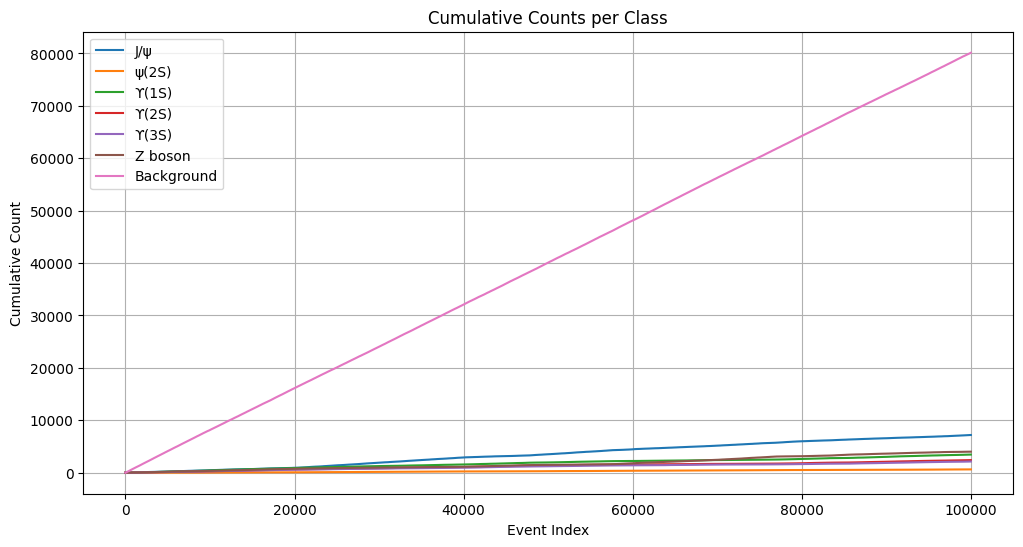

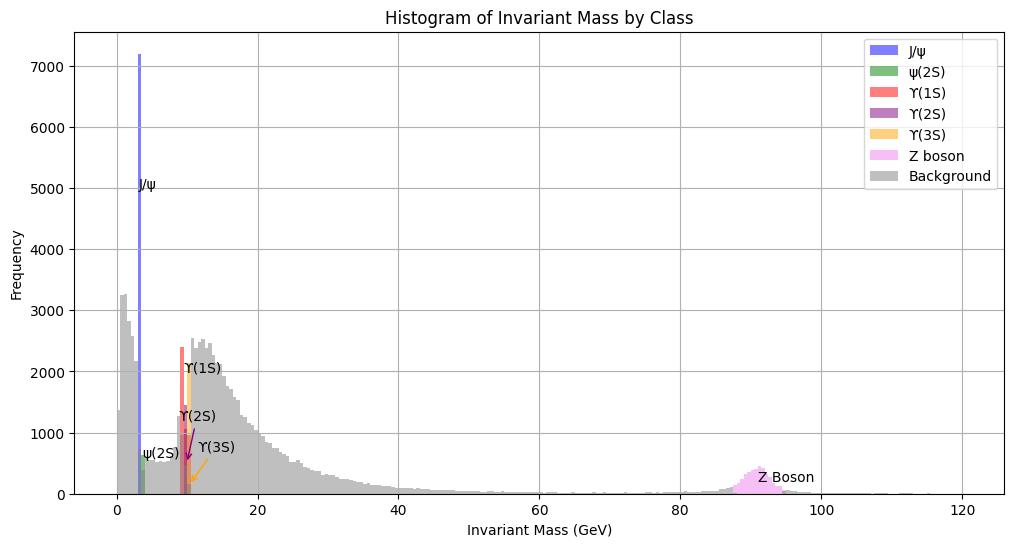

Label distribution:
label
J/ψ            7198
ψ(2S)           634
ϒ(1S)          3462
ϒ(2S)          2412
ϒ(3S)          2138
Z boson        4015
Background    80141
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load and Preprocess Data ---

# Load the CSV file
data = pd.read_csv('/Users/xDAyN/Desktop/cs project/School Project/Dimuon_DoubleMu.csv')

# Calculate overall charge of the two muons
data['Q_total'] = data['Q1'] + data['Q2']

# Keep only events with total charge zero (opposite sign muon pairs)
data = data[data['Q_total'] == 0].reset_index(drop=True)

print(f"Filtered data size: {len(data)} events with total charge zero")

# Nominal masses (GeV)
nominal_masses = {
    0: 3.10,    # J/ψ
    1: 3.685,   # ψ(2S)
    2: 9.45,    # ϒ(1S)
    3: 9.94,    # ϒ(2S)
    4: 10.265,  # ϒ(3S)
    5: 91.1876  # Z boson
}

# Relative uncertainties (fractional, e.g. 0.04 = 4%)
uncertainties = {
    0: 0.03,  # ~3% for J/ψ
    1: 0.03,  # ~3% for ψ(2S)
    2: 0.02,  # ~2% for ϒ(1S)
    3: 0.02,  # ~2% for ϒ(2S)
    4: 0.02,  # ~2% for ϒ(3S)
    5: 0.04   # 4% for Z boson (physics + detector combined)
}

def classify_mass(mass):
    for class_id, m_nom in nominal_masses.items():
        delta = uncertainties[class_id]
        lower = m_nom * (1 - delta)
        upper = m_nom * (1 + delta)
        if lower <= mass <= upper:
            return class_id
    return 6  # Background


# Apply classification to dataset
data['label'] = data['M'].apply(classify_mass)

# --- 1. Scatter Plot of All Invariant Masses ---

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['M'], '.', markersize=2)
plt.xlabel('Event Index')
plt.ylabel('Invariant Mass (GeV)')
plt.title('All Invariant Mass Values')
plt.ylim(0, 120)
plt.grid(True)
plt.show()

# --- 2. Cumulative Count Per Class ---

plt.figure(figsize=(12, 6))
for class_id, name in class_names.items():
    cumulative = []
    count = 0
    for val in data['label']:
        if val == class_id:
            count += 1
        cumulative.append(count)
    plt.plot(cumulative, label=name)

plt.xlabel('Event Index')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Counts per Class')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Histogram of Invariant Mass by Class ---

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'violet', 'gray']

bins = np.linspace(0, 120, 241)  # 0 to 120 GeV in 0.5 GeV bins

# Plot histogram per class
for class_id, color in zip(class_names.keys(), colors):
    subset = data[data['label'] == class_id]['M']
    plt.hist(subset, bins=bins, alpha=0.5,
             label=class_names[class_id], color=color)

plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Frequency')
plt.title('Histogram of Invariant Mass by Class')
plt.grid(True)
plt.legend()

# --- Annotate Important Peaks ---

plt.text(3.1, 5000, 'J/ψ', color='black', fontsize=10)
plt.text(3.7, 600, 'ψ(2S)', color='black', fontsize=10)
plt.text(9.45, 2000, 'ϒ(1S)', color='black', fontsize=10)
plt.text(91.0, 200, 'Z Boson', color='black', fontsize=10)

plt.annotate('ϒ(2S)',
             xy=(9.95, 500),
             xytext=(8.7, 1200),
             arrowprops=dict(arrowstyle='->', color='purple'),
             fontsize=10, color='black')

plt.annotate('ϒ(3S)',
             xy=(10.28, 150),
             xytext=(11.5, 700),
             arrowprops=dict(arrowstyle='->', color='orange'),
             fontsize=10, color='black')

plt.show()

# --- 4. Print Label Distribution ---›

print("Label distribution:")
print(data['label'].value_counts().sort_index().rename(index=class_names))
